In [2]:
import gym
import numpy as np
import math, random, time
from IPython.display import clear_output
#import
from copy import deepcopy
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Frozen Lake Environment

In [3]:
#Lets use the Frozen Lake Environment
env = gym.make('FrozenLake-v0')

In [4]:
#Lets check the environment Action space: how many total action can be taken
env.action_space

Discrete(4)

In [5]:
#Environment Observation Space: States accessible to the agent
env.observation_space

Discrete(16)

## Q-Learning Implementation on Frozen Lake Environment

In [13]:
# Action based on epsilon. here default epsilon value is kept 0.05; later we'll  find an optimal value for epsilon
def epsilon_greedy_action(q, s, epsilon=0.05):
    if np.random.rand() > epsilon:
        return np.argmax(q[s])
    return np.random.randint(4)

In [14]:
## Function for calculating the average performance. 
def average_performance(policy_fct, q):
    acc_returns = 0.
    n = 500
    for i in range(n):
        done = False
        s = env.reset()
        while not done:
            a = policy_fct(q, s)
            s, reward, done, info = env.step(a)
            acc_returns += reward
    return acc_returns/n

In [15]:
## Function for greedy policy
def greedy_policy(q, s):
    return np.argmax(q[s])


In [30]:
## Here we'll give the initial value to the Q Table. Being Optimistic, we've given '1' value to all the cells 
q = np.ones((16, 4)) # optimism
#q = - np.ones((16, 4)) # pessimism 
#q = np.random.rand(16, 4) * 2. - 1. # random
#q = np.zeros((16, 4))
## Defining Parameters such as no of episodes, steps, epsilon, etc.
nb_episodes = 200000
STEPS=2000
alpha = 0.001
gamma = 1.
epsion = 0.05
#Q_performance Array. This will help us in finding results
q_performance = np.ndarray(nb_episodes//STEPS) 
# Q-Learning: Off-policy TD control algorithm
total_epochs=0
total_reward=0
for i in range(nb_episodes):
    done = False
    s = env.reset()
    epochs=0
    
    while not done:
        a = epsilon_greedy_action(q, s) # behaviour policy 
        new_s, reward, done, info = env.step(a)
        a_max = np.argmax(q[new_s]) # estimation policy 
        q[s, a] = q[s, a] + alpha * (reward + gamma * q[new_s, a_max] - q[s, a])
        s = new_s
        
        total_reward+=reward
        epochs += 1
        total_epochs += epochs
        
    # for plotting the performance    
    if i%STEPS == 0:
        q_performance[i//STEPS] = average_performance(greedy_policy, q)
        
# Calculating Average Timesteps per Epsiode, just like we did for the SARSA
q_avg_time = total_epochs / nb_episodes
#Calculating Q-Learning Success Rate
q_success=100*(total_reward/nb_episodes)
## printing Average TimeSteps per episode
print("Average Timesteps Per Episode : ", q_avg_time)
#Printing Success Percentage of Q-Learning on Frozen Lake
print("Success Percentage : ", q_success)

Average Timesteps Per Episode :  222.290565
Success Percentage :  8.737


Text(0.5, 1.0, 'Learning progress for Q-Learning')

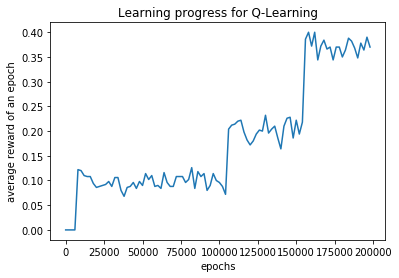

In [19]:
# Let's plot the results
plt.plot(STEPS * np.arange(nb_episodes//STEPS), q_performance)
plt.xlabel("epochs")
plt.ylabel("average reward of an epoch")
plt.title("Learning progress for Q-Learning")

The observation space is discrete, just like the taxi-problem and unlike the cart problem which had the continuous space.

# NOW Implementing SARSA on Frozen lake.
Below are functions that we'll use for SARSA implementation

In [20]:
#Get the action which will be taken by the epsilon_greedy_action function.
def get_action(epsilon):
    return lambda q,s: epsilon_greedy_action(q, s, epsilon=epsilon)

In [21]:
## Function for plotting the performance of SARSA for finding optimal Epsilon 
def performance_plot(performance):
    nb_plots = len(performance)
    plt.figure(figsize=(10,20))
    plt.suptitle("Learning progress depending on epsilon")
    for i, perf in enumerate(sorted(performance)):
        plt.subplot(nb_plots, 1, i+1)
        plt.plot(STEPS * np.arange(nb_episodes//STEPS), performance[perf], label=perf)
        plt.xlabel("epochs")
        plt.ylim(-0.01,0.7)
        plt.ylabel("average reward of an epoch")
        plt.legend()

In [22]:
#Number of episodes
nb_episodes = 200000

In [23]:
#no of step
STEPS = 2000

In [24]:
# Our main function for implementing SARSA which is a On-policy TD control algorithm
def sarsa(alpha = 0.02, 
              gamma = 1., 
              epsilon = 0.05,
              q = None, 
              progress = None, 
              env=env):
    #Variables for calculating success rate and average time-steps
    total_epochs = 0
    total_reward=0
   
    
    if q is None:
        q = np.ones((16,4)) 
    
    for i in range(nb_episodes):
        done = False
        s = env.reset()
        a = epsilon_greedy_action(q, s, epsilon=epsilon)
        epochs=0
        while not done:
            new_s, reward, done, info = env.step(a)
            new_a = epsilon_greedy_action(q, new_s, epsilon=epsilon)
            q[s, a] = q[s, a] + alpha * (reward + gamma * q[new_s, new_a] - q[s, a]) #SARSA Equation
            s = new_s
            a = new_a
            total_reward+=reward
            epochs += 1
            total_epochs += epochs
            
        
        # only for plotting the performance, not part of the algorithm 
        if progress is not None and i%STEPS == 0:
            progress[i//STEPS] = average_performance(get_action(epsilon), q=q)
    
    #store metrics
    sarsa_avg_time = total_epochs / nb_episodes
    success=100*total_reward/nb_episodes
            
    return q, progress, sarsa_avg_time,success

### Uncomment below code for epsilon check
As the no of episodes is large, this will take some time, that is why it is uncommented.

In [16]:
# param_performance = dict()
# for param in np.arange(0.01, 0.11, 0.02):
#     progress = np.zeros((nb_episodes//STEPS))
#     _, param_performance[str(param)],_,_ = sarsa(epsilon=param, progress=progress)
#     print ("done:", param)

In [17]:
#performance_plot(param_performance)

## SARSA Implementation on Optimal Epsilon Value
As our optimal Epsilon value is 0.05, which is the also the default value of the SARSA function. we dont have to specify it explicitly 

In [25]:
## Implementing SARSA Here
sarsa_performance = np.ndarray(nb_episodes//STEPS)
q, sarsa_performance,sarsa_avg_timestep,success = sarsa(progress=sarsa_performance)

In [26]:
# Printing the Average timesteps per episode
print("Average Timesteps Per Episode : ", sarsa_avg_timestep)

Average Timesteps Per Episode :  570.074115


In [27]:
## Lets print the success percentage of SARSA 
print("Success Percentage : ", success)

Success Percentage :  28.9255


Text(0, 0.5, 'average reward of an epoch')

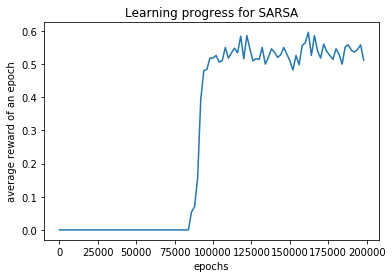

In [28]:
## Plotting the Results of SARSA
plt.plot(STEPS*np.arange(nb_episodes//STEPS), sarsa_performance)
plt.xlabel("epochs")
plt.title("Learning progress for SARSA")
plt.ylabel("average reward of an epoch")

In [29]:
# Average Performance of SARSA
print(average_performance(greedy_policy, q=q)) 

0.718


In [31]:
## printing Average TimeSteps per episode
print("Average Timesteps Per Episode : ", q_avg_time)

Average Timesteps Per Episode :  222.290565


# CARTPOLE ENVIRONMENT

## SARSA on CARTPOLE

In [32]:
#Now Lets use the Cartpole Environment. We'll implement SARSA on this environment
env = gym.make('CartPole-v0')

In [33]:
#Observation Space of Cart-pole
env.observation_space

Box(4,)

In [34]:
#Action Space of Cartpole
env.action_space

Discrete(2)

### Modifying SARSA function for CARTPOLE
Cartpole has a Continuos Observation space. we'll have perform discretization on that first.

In [35]:
# Declaring and Initializing the Variables.
Q_table = np.zeros((2,2,8,4,2))
alpha=0.3
buckets=[2, 2, 8, 4]
gamma=0.99

In [36]:
#Function to discrete the states
def toDiscreteStates(observation):
    interval=[0 for i in range(len(observation))]
    max_range=[2,3,0.42,3] #[4.8,3.4*(10**38),0.42,3.4*(10**38)]

    for i in range(len(observation)):
        data = observation[i]
        inter = int(math.floor((data + max_range[i])/(2*max_range[i]/buckets[i])))
        if inter>=buckets[i]:
            interval[i]=buckets[i]-1
        elif inter<0:
            interval[i]=0
        else:
            interval[i]=inter
    return interval

In [37]:
def get_action(observation,t):
    if np.random.random()<max(0.05, min(0.5, 1.0 - math.log10((t+1)/150.))):
        return env.action_space.sample()
    interval = toDiscreteStates(observation)

    if Q_table[tuple(interval)][0] >=Q_table[tuple(interval)][1]:
        return 0
    else:
        return 1

def updateQ_SARSA(observation,reward,action,ini_obs,next_action,t):
    interval = toDiscreteStates(observation)
    Q_next = Q_table[tuple(interval)][next_action]
    ini_interval = toDiscreteStates(ini_obs)
    Q_table[tuple(ini_interval)][action]+=0.1*(reward + gamma*(Q_next) - Q_table[tuple(ini_interval)][action])

In [38]:
#No of Episodes and STEPS
Episodes=10000
STEPS=100

In [39]:
rewards=[]
for i_episode in range(Episodes):
    observation = env.reset()
    t=0
    while (True):
        #env.render()
        action = get_action(observation,i_episode)
        observation1, reward, done, info = env.step(action)
#         print observation1
        next_action = get_action(observation1,i_episode)
        updateQ_SARSA(observation1,reward,action,observation,next_action,t)
        observation=observation1
        action = next_action
        t+=1
        if done:
            if i_episode%STEPS == 0:
                rewards.append((t+1)/500)
#             print("Episode finished after {} timesteps".format(t+1))

        
            break

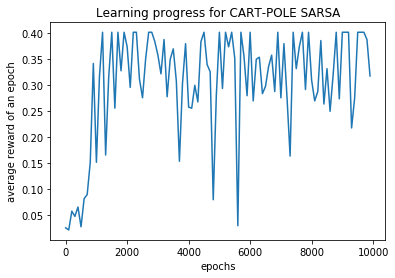

In [44]:
#Plot the results
plt.plot(STEPS * np.arange(Episodes//STEPS),rewards)
plt.xlabel("epochs")
plt.ylabel("average reward of an epoch")
plt.title("Learning progress for CART-POLE SARSA")
plt.show()

# THE END.